In [1]:
from matplotlib import pyplot as plt
from museek.util.context_loader import ContextLoader
from museek.enum.result_enum import ResultEnum
import numpy as np
import os

In [2]:
from museek.plugin.sanity_check_observation_plugin import SanityCheckObservationPlugin
from museek.config.sanity_check import SanityCheckObservationPlugin as SanityCheckObservationPluginConfig

print(SanityCheckObservationPluginConfig)
sanity_check_plugin = SanityCheckObservationPlugin(**SanityCheckObservationPluginConfig)

{'reference_receiver_index': 0, 'elevation_sum_square_difference_threshold': 0.01, 'elevation_square_difference_threshold': 0.001, 'elevation_antenna_standard_deviation_threshold': 0.01}


In [4]:
block_name = '1681920680'
context_loader = ContextLoader(f'/idia/users/schatterjee/UHF_testing/museek/results/{block_name}/scan_track_split_plugin.pickle')

requirements_dict = context_loader.requirements_dict(plugin=sanity_check_plugin)
print(requirements_dict)

{'all_data': <museek.time_ordered_data.TimeOrderedData object at 0x7f6a510b4a90>, 'scan_data': <museek.time_ordered_data.TimeOrderedData object at 0x7f6a50c613c0>, 'output_path': '/idia/users/schatterjee/UHF_testing/museek/results/1681920680/'}


In [5]:
scan_data = context_loader.get_result(location=ResultEnum.SCAN_DATA)
print(scan_data)

Name: 1681920680_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: file:///idia/raw/hi_im/SCI-20220822-MS-01/1681920680/1681920680/1681920680_sdp_l0.full.rdb
Observer: Mario Santos  Experiment ID: 20230419-0017
Description: 'UHF HI intensity mapping desi 2 rising  no.6 offset=5'
Observed from 2023-04-19 18:13:17.633 SAST to 2023-04-19 20:44:59.597 SAST
Dump rate / period: 0.50077 Hz / 1.997 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m000,m001,m002,m003,m004,m005,m006,m007,m008,m009,m010,m011,m012,m013,m014,m015,m016,m018,m019,m020,m021,m022,m023,m024,m025,m026,m027,m028,m029,m030,m031,m032,m033,m034,m035,m036,m038,m041,m042,m043,m044,m045,m046,m047,m049,m050,m051,m052,m053,m054,m056,m057,m058,m059,m060,m061,m062,m063  116      232
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 UHF  c544M4k     816.000         544.000           4096     

In [8]:
timestamp_dates = scan_data.timestamp_dates
dish_mean_elevation = scan_data.elevation.mean(axis=-1)


Antenna 0 is weird!
Antenna 1 is weird!
Antenna 2 is weird!
Antenna 3 is weird!
Antenna 4 is weird!
Antenna 5 is weird!
Antenna 6 is weird!
Antenna 7 is weird!
Antenna 8 is weird!
Antenna 9 is weird!
Antenna 10 is weird!
Antenna 11 is weird!
Antenna 12 is weird!
Antenna 13 is weird!
Antenna 14 is weird!
Antenna 15 is weird!
Antenna 16 is weird!
Antenna 17 is weird!
Antenna 18 is weird!
Antenna 19 is weird!
Antenna 20 is weird!
Antenna 21 is weird!
Antenna 22 is weird!
Antenna 23 is weird!
Antenna 24 is weird!
Antenna 25 is weird!
Antenna 26 is weird!
Antenna 27 is weird!
Antenna 28 is weird!
Antenna 29 is weird!
Antenna 30 is weird!
Antenna 31 is weird!
Antenna 32 is weird!
Antenna 33 is weird!
Antenna 34 is weird!
Antenna 35 is weird!
Antenna 36 is weird!
Antenna 37 is weird!
Antenna 38 is weird!
Antenna 39 is weird!
Antenna 40 is weird!
Antenna 41 is weird!
Antenna 42 is weird!
Antenna 44 is weird!
Antenna 45 is weird!
Antenna 46 is weird!
Antenna 47 is weird!
Antenna 48 is weird!
An

Text(0.5, 0, 'time')

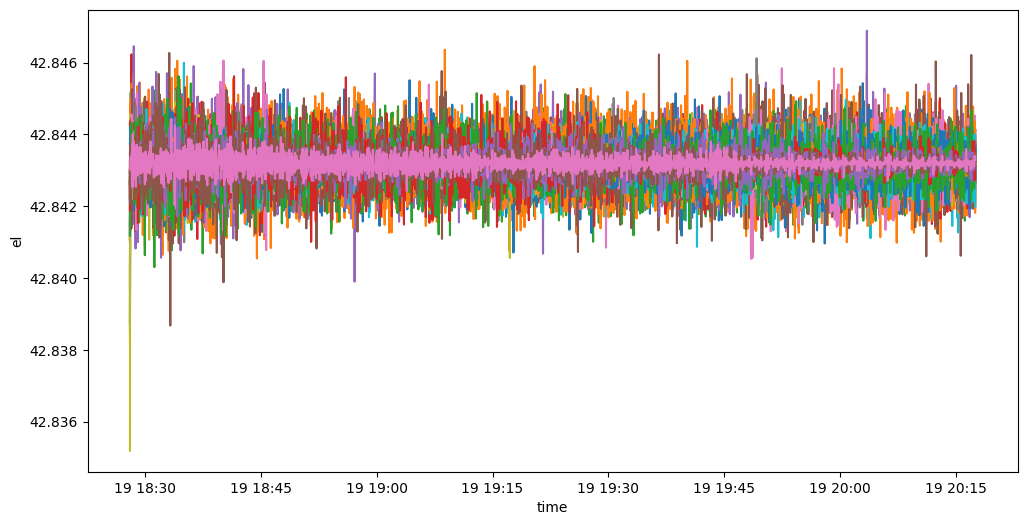

In [7]:
plt.figure(figsize=(12,6))
for i_antenna in range(len(scan_data.antennas)):
    if i_antenna in [43]:
        continue
    mean_elevation = dish_mean_elevation.squeeze
    elevation = scan_data.elevation.get(recv=i_antenna).squeeze
    if (elevation > 35).any() or (elevation < 32).any():
        print(f'Antenna {i_antenna} is weird!')
    plt.plot(timestamp_dates.squeeze, elevation)
plt.ylabel('el')
plt.xlabel('time')